<a href="https://colab.research.google.com/github/eolson615/SpringboardDSCareerTrack/blob/master/Capstone2_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#I will take the data from the Telco data set that I cleaned in another notebook and perform Exploritory Data Analysis on it along with some pre-processing. At the end of this notebook, I should have a data set that will be ready to plug into the different models I will be using later.

###First I will load the packages needed, link to the google drive, and load my clean data set.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [5]:
df_url = 'https://raw.githubusercontent.com/eolson615/SpringboardDSCareerTrack/master/Capstone2/Data/telcodata_clean.csv'
df = pd.read_csv(df_url, index_col=[0])
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


###I'll again look at the summary stats tables for the numeric data.

In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


###Now I will do some histograms and other initial plots for the numeric data.

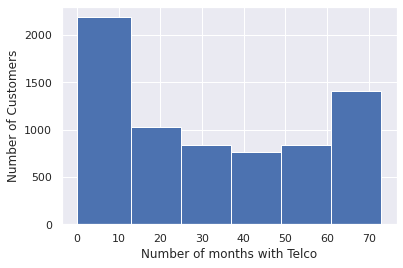

In [8]:
bins_edges = [0, 13, 25, 37, 49, 61, 73]  #this was done to represent the number of years, as tenure's units is in months
_ = plt.hist(df['tenure'], bins= bins_edges)
_ = plt.xlabel('Number of months with Telco')
_ = plt.ylabel('Number of Customers')
plt.show()

So we see that there is a huge drop off after 12 months. So that is something to keep an eye on. We also notice that the 61-72 month bin is the second largest. Again this is something we can dig into more.

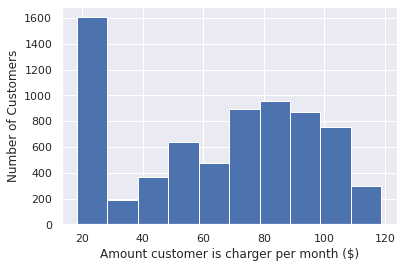

In [9]:
_ = plt.hist(df['MonthlyCharges'])
_ = plt.xlabel('Amount customer is charger per month ($)')
_ = plt.ylabel("Number of Customers")
plt.show()

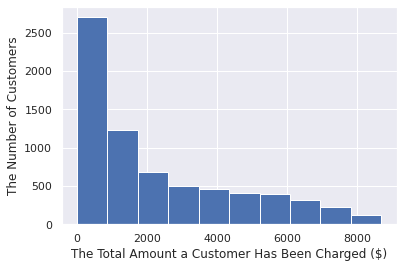

In [10]:
_ = plt.hist(df['TotalCharges'])
_ = plt.xlabel('The Total Amount a Customer Has Been Charged ($)')
_ = plt.ylabel('The Number of Customers')
plt.show()

This histogram in light of the one with longevity seems a little interesting. We might have thought we would see a slight up tick in terms of Total Amount because their was such an uptick in the number of customers who had been with the company the longest. We might have thought a simple formula like, a higher longeity corrilate with a higher total amount spent. This is something to possibly look into as well.

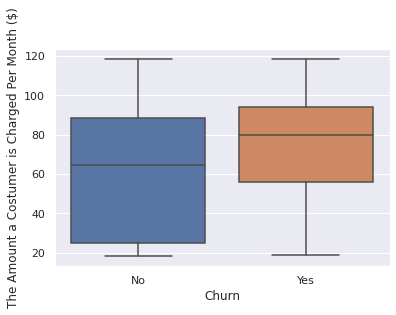

In [11]:
_ = sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
_ = plt.xlabel('Churn')
_ = plt.ylabel('The Amount a Costumer is Charged Per Month ($)')
plt.show()

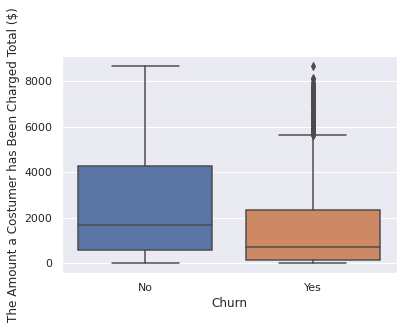

In [12]:
_ = sns.boxplot(x='Churn', y='TotalCharges', data=df)
_ = plt.xlabel('Churn')
_ = plt.ylabel('The Amount a Costumer has Been Charged Total ($)')
plt.show()

That is interesting. The middle 50% of the Monthly Charges who have churned is on the higher end of those who stayed, while in the total amount spent those who churned are on the lower part of those who stayed.

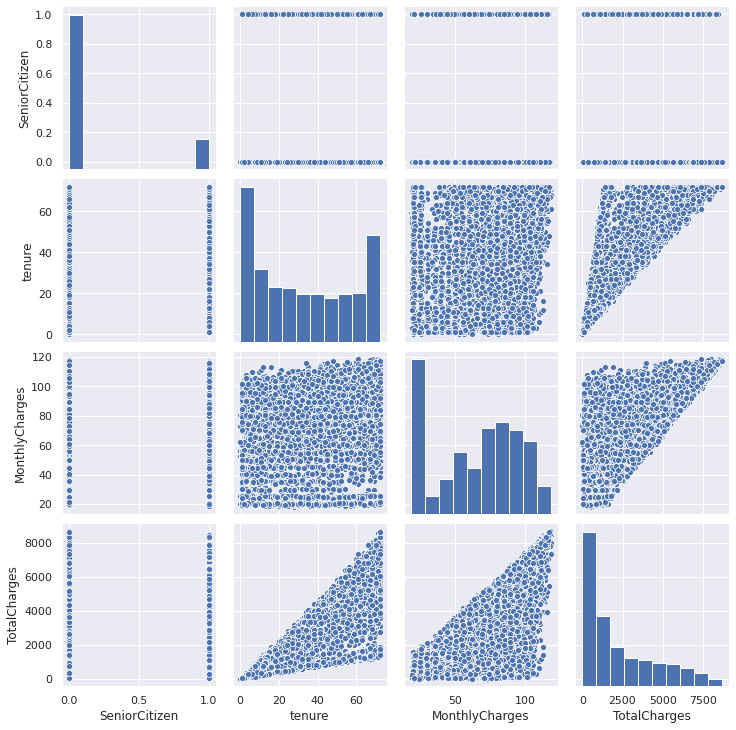

In [13]:
sns.pairplot(df)

###Now I will look at the catagorical data.

In [14]:
df_obejctcolumns = ['gender', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'Churn']
for i in df_obejctcolumns:
  print(i)
  print(df[i].value_counts())
  print(df[i].value_counts(normalize=True))

gender
Male      3555
Female    3488
Name: gender, dtype: int64
Male      0.504756
Female    0.495244
Name: gender, dtype: float64
Partner
No     3641
Yes    3402
Name: Partner, dtype: int64
No     0.516967
Yes    0.483033
Name: Partner, dtype: float64
Dependents
No     4933
Yes    2110
Name: Dependents, dtype: int64
No     0.700412
Yes    0.299588
Name: Dependents, dtype: float64
PhoneService
Yes    6361
No      682
Name: PhoneService, dtype: int64
Yes    0.903166
No     0.096834
Name: PhoneService, dtype: float64
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
No                  0.481329
Yes                 0.421837
No phone service    0.096834
Name: MultipleLines, dtype: float64
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
Fiber optic    0.439585
DSL            0.343746
No             0.216669
Name: InternetService, dtype: float64
OnlineSecur

###One last thing to look at. I will check the number of unique values for the costumerID. If each costumer has a unique ID, then I will drop them as it appears they are random alpha-numeric combinations.

In [15]:
customerID_unique = df['customerID'].nunique()
customerID_unique

7043

In [16]:
df.drop('customerID', axis=1, inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


###Now I will export my new data set!

In [17]:
df.to_csv('telcodata_posteda.csv')

from google.colab import files
files.download('telcodata_posteda.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>